## Imports and data prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('data-week-3.csv')
 
df.columns = df.columns.str.lower().str.replace(' ', '_')
 
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
 
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
 
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
 
df.churn = (df.churn == 'yes').astype(int)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


## Split the data and train the model

In [3]:
# Next, we use the ‘train_test_split’ function to split the datasets into ‘full_train’ (80%) and ‘test’ in the first step. 
# In the second step, ‘full_train’ is further divided into two datasets for training and validation. 
# Ultimately, we achieve a split of the initial data into a 60%-20%-20% ratio, where 60% is used for training, 
# and 20% each is allocated for validation and testing. 
# The parameter ‘random_state=1’ ensures that the random split is reproducible.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
 
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values
 
del df_train['churn']
del df_val['churn']
del df_test['churn'] 

df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50


In [4]:
# Define two features lists, ‘numerical’ and ‘categorical’, which contain the relevant column names. 
# The ‘numerical’ array contains the names of all numerical columns, while the ‘categorical’ 
# array contains the names of all categorical columns.

numerical = ['tenure', 'monthlycharges', 'totalcharges']
 
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [5]:
# Next, we create a DictVectorizer instance. We then transform the dataframe into dictionaries, 
# and using the ‘fit_transform(train_dict)’ function, we train the DictVectorizer. This step involves 
# showing the DictVectorizer how the data is structured, allowing it to distinguish column names and 
# values and perform one-hot encoding based on this information. Importantly, the DictVectorizer is 
# smart enough to distinguish between categorical values and numeric values, so numeric values are 
# ignored during one-hot encoding. The ‘transform’ part of this process converts the dictionary 
# into a vector or matrix suitable for machine learning.

# After preparing the data, we move on to model creation. In this case, a Logistic Regression model is used. 
# The ‘model.fit’ function is then employed to train the model on the training data.

dv = DictVectorizer(sparse=False)
 
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
 
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
# We can then proceed to validate the trained model using the validation data. 
# To do this, we need to prepare the validation DataFrame in the same way as shown 
# for the training DataFrame. This involves transforming it into dictionaries and 
# applying the ‘transform’ function of the DictVectorizer. However, during validation, 
# we only need to use the ‘transform’ function of the DictVectorizer since it already 
# knows the data structure. In the case of validation, we are primarily interested 
# in the transformed output, which serves as input for prediction.

# For prediction, we use the ‘predict_proba’ function of the model, which provides 
# us with probabilities in two columns. Here, we are interested in the second 
# column. We evaluate the model’s performance using a threshold of ‘>=0.5’. 
# The ‘churn_decision’ variable contains ‘True’ for any value in the prediction 
# greater than or equal to the threshold, and ‘False’ otherwise. We calculate the 
# accuracy using the ‘mean’ function, and in this case, it is approximately 80%.

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
 
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()
 
# Output: 0.8034066713981547

np.float64(0.8034066713981547)

In [7]:
# calc another way to double-check myself:
churn_decision2 = model.predict(X_val)
(y_val == churn_decision2).mean()
# same output 0.8034066713981547

np.float64(0.8034066713981547)

## Accuracy and dummy model

In [8]:
# Out of the 1409 customers in the validation dataset, we made 1132 correct predictions. Therefore, 
# the accuracy is calculated as 1132/1409 = 0.80, which corresponds to 80%. This accuracy 
# indicates that our model correctly predicted the churn status for 80% of the customers in the 
# validation dataset. Whether this is considered good or not 
# depends on the specific context and requirements of the problem.

len(y_val)
# Output: 1409
 
(y_val == churn_decision).sum()
# Output: 1132
 
1132 / 1409
# Output: 0.8034
 
# accuracy = (y_val == churn_decision).mean()
# Output: 0.8034

0.8034066713981547

In [9]:
# RE our churn decision - it may or may not be correct:
# churn_decision = (y_pred >= 0.5) # 0.5 was selected by gur feel, lets test it properly...

# TLDR:
# The question now is whether we have chosen a good value for the threshold. To evaluate 
# this, we can adjust the threshold and perform validation again. By systematically 
# varying the threshold, we can observe whether it improves the accuracy or not. To do this, 
# we can use the ‘linspace’ function from NumPy to generate an array with multiple threshold 
# values (e.g., 21 values evenly spaced between 0 and 1). For each threshold value, we can 
# calculate the accuracy and then determine the best threshold value based on the validation 
# results. This process allows us to fine-tune the threshold to optimize the model’s performance.

thresholds = np.linspace(0, 1, 21)
thresholds
 
# Output:        
# array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
#        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [10]:
scores = []
 
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

# actually our initial choice was right and with 0.5 we get best accuracy - 0.50 0.803 - see below
# thats why in model.predict - << churn_decision2 = model.predict(X_val) >> - threshold 0.5 is baked in by SKL automatically...

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.667
0.20 0.710
0.25 0.737
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


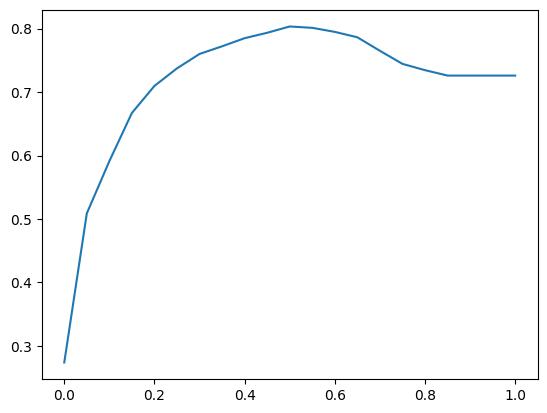

In [11]:
# TLDR 
# It appears that 0.5 is indeed the best threshold based on the validation set. This 
# suggests that the default threshold of 0.5 is an appropriate choice for our model in this 
# context. To visually represent this threshold optimization process, we can create a plot. 
# The x-axis will represent the threshold values, while the y-axis will represent the corresponding 
# scores (in this case, accuracy or another relevant metric). This plot will provide a clear visualization 
# of how the model’s performance varies with different threshold values, helping us identify the threshold 
# that maximizes the desired metric.

plt.plot(thresholds,scores) # 0.5 is our curve max

In [12]:
# we don't have to do it manually all the time - SKL has built-in function
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_val, y_pred>=0.5)
# same 0.8034066713981547 as before

0.8034066713981547

In [14]:
# and we can modify our function as 

scores = []
 
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

# same as before 0.50 0.803

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.667
0.20 0.710
0.25 0.737
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [16]:
# Check Accuracy of Dummy Baseline
# dummy model predicts with 73% accuracy - if we say no one would churn and no need to send promo emails:
accuracy_score(y_val, y_pred>= 1.0)
# 0.7260468417317246 = 73% - this is the baseline prediction
# We improved by 7% over the baseline so far...

0.7260468417317246

In [17]:
# it happens because our distribution is skewd - 3:1 class imbalance:
from collections import Counter

Counter(y_val) # counts our instances like so:
# Counter({np.int64(0): 1023, np.int64(1): 386})
# we have 1023 non-churn and only 386 churn customer cases - 3:1 ratio

Counter({np.int64(0): 1023, np.int64(1): 386})

In [18]:
y_val.mean()
# np.float64(0.2739531582682754) - only 27% customers churn

np.float64(0.2739531582682754)

In [19]:
1-y_val.mean()
# np.float64(0.7260468417317246) - 73% non-churning customers - 
# this is exactly the 73% our dummy model predicted...
# so if we predict no one will churn - by dummy model or by bad quality model 
# due to the class imbalance 3:1 we will be right in 73% - our baseline. 

# I remember Casie Kozyrkov Google ML eng lecture and her parking lot example 
# where the model predicted parking always 100% occupied.


np.float64(0.7260468417317246)

## Confusion table / confusion matrix

In [27]:
# we have to use other metrics than accuracy in our class imbalanced case,
# because accuracy alone gives us only 7% over the baseline - not enough.
actual_positive = (y_val == 1) # people who in fact churned
# actual_positive # array([False, False, False, ..., False,  True,  True], shape=(1409,))
actual_negative = (y_val == 0) # people who in fact did NOT churn


In [22]:
t = 0.5 # our threshold
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [23]:
# then true positive are in fact people who did churn and were predicted to churn:
true_positive = actual_positive & predict_positive 
# & - logical AND - here select people who were positive in both cases

In [25]:
# how many of them?
tp = (actual_positive & predict_positive).sum()
tp # 210

np.int64(210)

In [29]:
# similar with true negatives - predicted not churn and not churned in real life
tn = (actual_negative & predict_negative).sum()
tn # 922

np.int64(922)

In [30]:
# false positive - people who were predicted to churn but never did:
fp = (actual_negative & predict_positive).sum()
fp # 101

np.int64(101)

In [31]:
# and false negative - people who were predicted to stay but in fact churned:
fn = (actual_positive & predict_negative).sum()
fn # 176

np.int64(176)

In [32]:
# quick sanity check -
fp + fn + tp + tn
# 1409 - this is how many people we have in val dataset - all good!

np.int64(1409)

In [34]:
# Lets create confusion matrix as Numpy array
confusion_matrix = np.array([
[tn, fp],
[fn, tp]
])

In [35]:
# lets print it out
confusion_matrix
# array([[922, 101],
#        [176, 210]])

array([[922, 101],
       [176, 210]])

In [37]:
# and get % values
(confusion_matrix / confusion_matrix.sum()).round(2)
# array([[0.65, 0.07],
#        [0.12, 0.15]])

# we ended up in 80% correct predictions - tp + tn = our accuracy 80%
# and 20% incorrect predictions - fp + fn

array([[0.65, 0.07],
       [0.12, 0.15]])

## Precision and recall

In [43]:
# from tp, tn, fp and fn we can derive other metrics too, not only confusion matrix and accuracy

# accuracy - how many correct predictions our model make
accuracy = (tp + tn)/(tp+tn+fp+fn)
accuracy # np.float64(0.8034066713981547) - our 80% accuracy

np.float64(0.8034066713981547)

In [46]:
# precision is fraction of positive predictions (churn) that are correct

p = tp / (tp + fp)  # true positives divided by all positives - 
# - how much churn we actually collect/address with our model - 
# - we were able to collect 2/3 churn customer cases
p # np.float64(0.6752411575562701) - 67%

np.float64(0.6752411575562701)

In [47]:
# recall - how many people our model recognised as churn out of all churning people

r = tp / (tp + fn)
r # np.float64(0.5440414507772021) - 54% - roughly 1/2

np.float64(0.5440414507772021)

## ROC curves

In [48]:
# ROC - receiver operating characteristics
# Comes from WWII - evaluating of the strength of radar detectors 
